<a href="https://colab.research.google.com/github/YeoJins/python-study_1/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving submission.csv to submission (1).csv
Saving test.csv to test (2).csv
Saving train.csv to train (2).csv


{'submission.csv': b'PassengerId,Survived\r\n892,0\r\n893,1\r\n894,0\r\n895,0\r\n896,1\r\n897,0\r\n898,1\r\n899,0\r\n900,1\r\n901,0\r\n902,0\r\n903,0\r\n904,1\r\n905,0\r\n906,1\r\n907,1\r\n908,0\r\n909,0\r\n910,1\r\n911,1\r\n912,0\r\n913,0\r\n914,1\r\n915,0\r\n916,1\r\n917,0\r\n918,1\r\n919,0\r\n920,0\r\n921,0\r\n922,0\r\n923,0\r\n924,1\r\n925,1\r\n926,0\r\n927,0\r\n928,1\r\n929,1\r\n930,0\r\n931,0\r\n932,0\r\n933,0\r\n934,0\r\n935,1\r\n936,1\r\n937,0\r\n938,0\r\n939,0\r\n940,1\r\n941,1\r\n942,0\r\n943,0\r\n944,1\r\n945,1\r\n946,0\r\n947,0\r\n948,0\r\n949,0\r\n950,0\r\n951,1\r\n952,0\r\n953,0\r\n954,0\r\n955,1\r\n956,0\r\n957,1\r\n958,1\r\n959,0\r\n960,0\r\n961,1\r\n962,1\r\n963,0\r\n964,1\r\n965,0\r\n966,1\r\n967,0\r\n968,0\r\n969,1\r\n970,0\r\n971,1\r\n972,0\r\n973,0\r\n974,0\r\n975,0\r\n976,0\r\n977,0\r\n978,1\r\n979,1\r\n980,1\r\n981,0\r\n982,1\r\n983,0\r\n984,1\r\n985,0\r\n986,0\r\n987,0\r\n988,1\r\n989,0\r\n990,1\r\n991,0\r\n992,1\r\n993,0\r\n994,0\r\n995,0\r\n996,1\r\n997,0\r\n9

In [ ]:
import io

In [ ]:
# 분석 라이브러리
import numpy as np 
import pandas as pd
import random as rnd
# 시각화 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
#etc
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#ML
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
#Null data check

In [ ]:
for col in train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (train[col].isnull().sum() / train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [ ]:
for col in test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (test[col].isnull().sum() / test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


In [ ]:
#Age(약 20%), cabin(약 80%), Embarked(train만 0.22%) null data가 존재함.

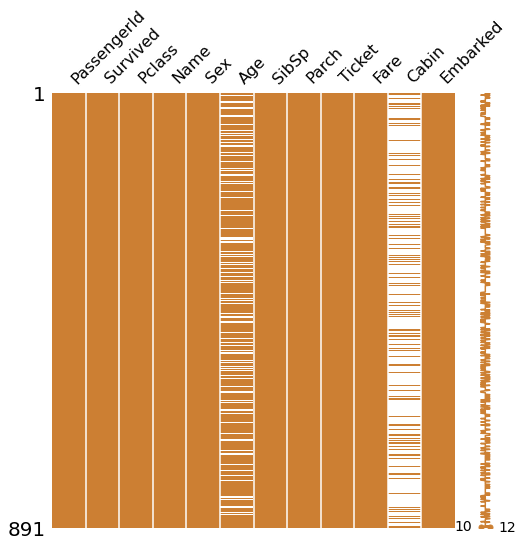

In [ ]:
msno.matrix(df=train.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

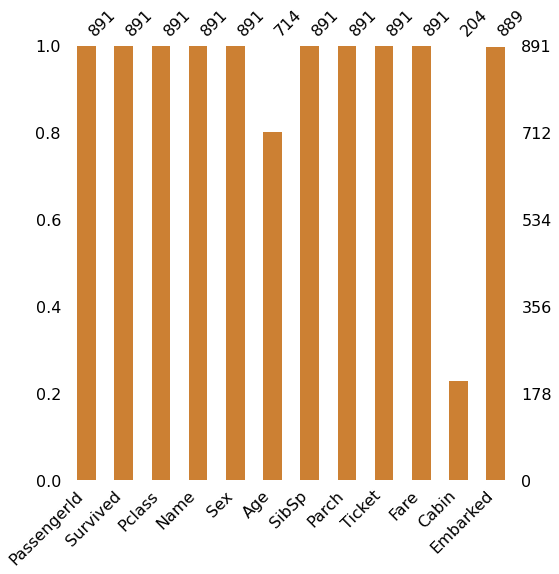

In [ ]:
msno.bar(df=train.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

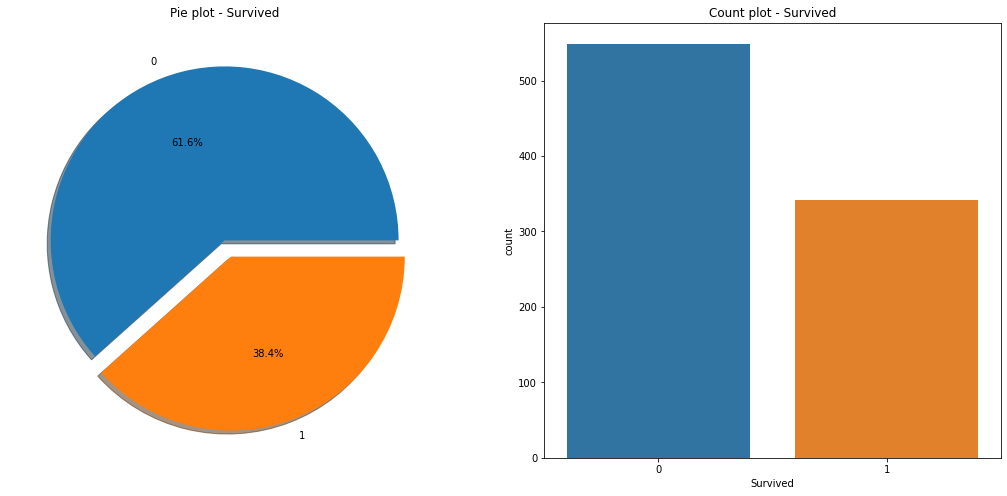

In [ ]:
f, ax = plt.subplots(1,2,figsize=(18,8))

train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

In [ ]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()
#각 클래스의 사람 수 확인(count)

,Survived
Pclass,
1,216
2,184
3,491


In [ ]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()
#생존한 사람(survived=1)의 총합을 줌

,Survived
Pclass,
1,136
2,87
3,119


In [ ]:
pd.crosstab(train['Pclass'], train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


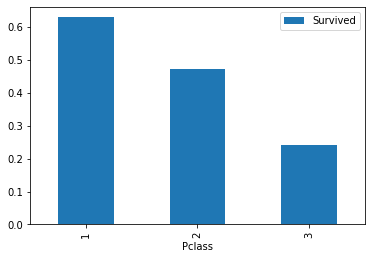

In [ ]:
#위의 코드에 mean()을 추가하면 각 클래스별 생존률을 얻을 수 있음
train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()

In [ ]:
#Pclass가 좋을수록 생존률이 높다.

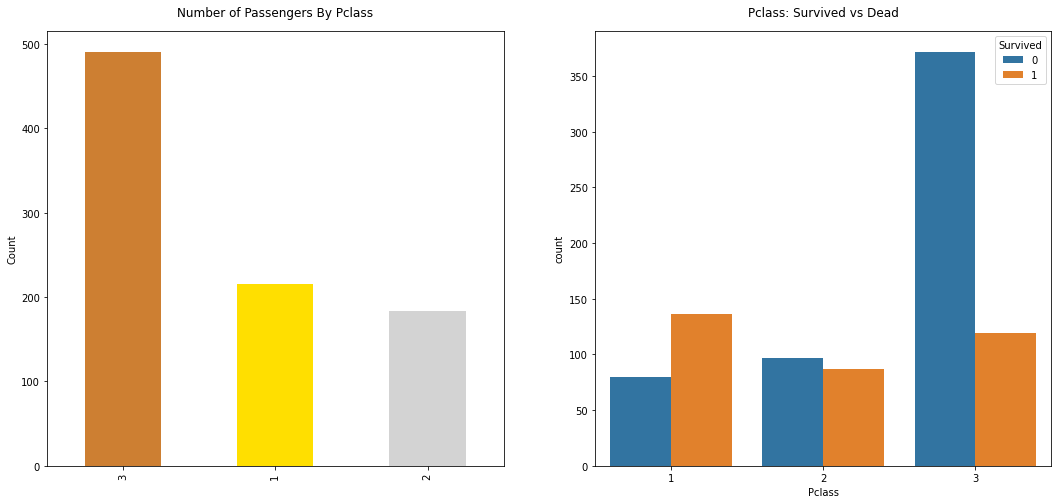

In [ ]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

In [ ]:
#성별로 생존률이 달라지는지 확인

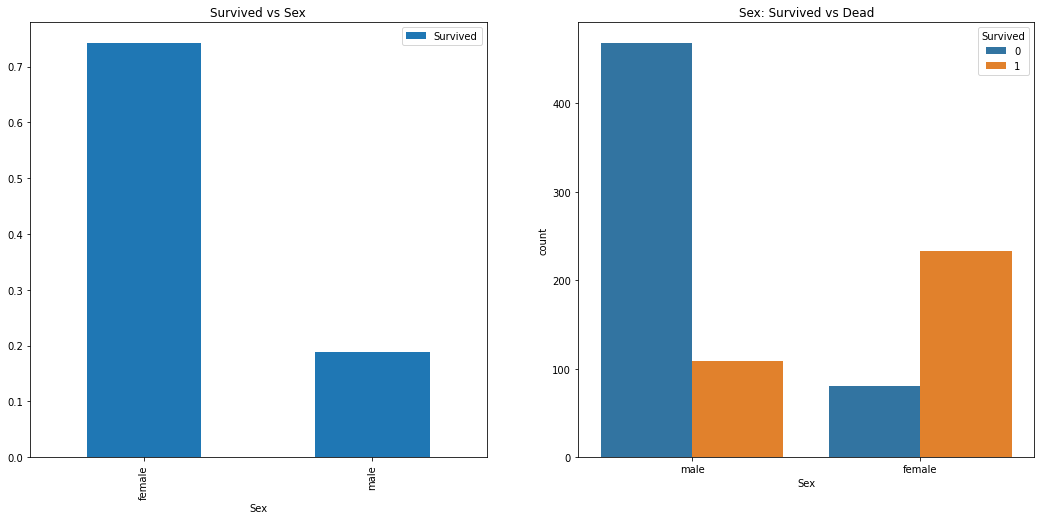

In [ ]:
f,ax = plt.subplots(1,2,figsize=(18,8))
train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived', data=train,ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [ ]:
#여자가 생존할 확률이 높은 것을 알 수 있다. 

In [ ]:
train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
pd.crosstab(train['Sex'], train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [ ]:
#Pclass와 마찬가지로 Sex도 중요한 feature이다.

In [ ]:
#이제 sex와 Pclass 모두를 고려한 그래프를 그려 보자.

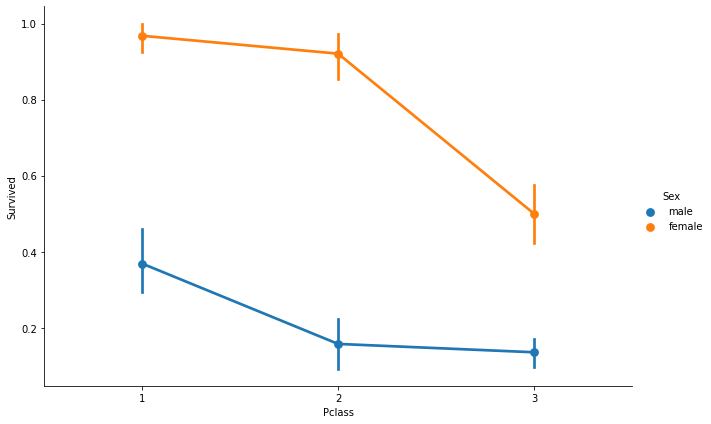

In [ ]:
sns.factorplot('Pclass','Survived',hue='Sex',data=train,size=6,aspect=1.5)

In [ ]:
#모든 클래스에서 생존할 확률이 female이 높다. 또한 성별 상관없이 클래스가 높을수록 생존할 확률이 높다.

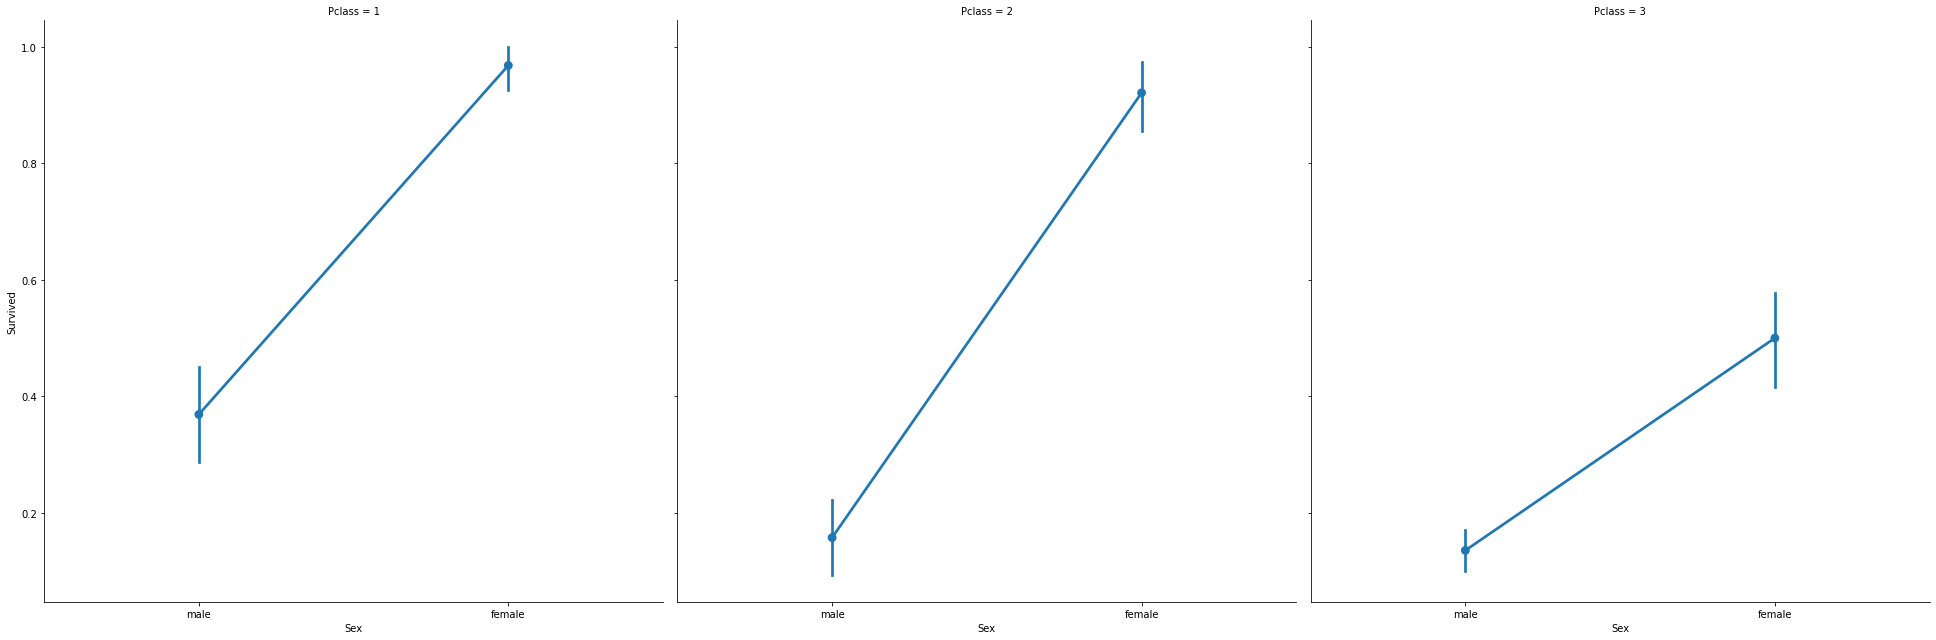

In [ ]:
sns.factorplot(x='Sex',y='Survived',col='Pclass',data=train,satireation=.5,size=9,aspect=1)

In [ ]:
print('가장 나이 많은 탑승객: {:.1f} Years'.format(train['Age'].max()))
print('제일 어린 탑승객: {:.1f} Years'.format(train['Age'].min()))
print('탑승객 나이 평균: {:.1f} Years'.format(train['Age'].mean()))

가장 나이 많은 탑승객: 80.0 Years
제일 어린 탑승객: 0.4 Years
탑승객 나이 평균: 29.7 Years


<function matplotlib.pyplot.show>

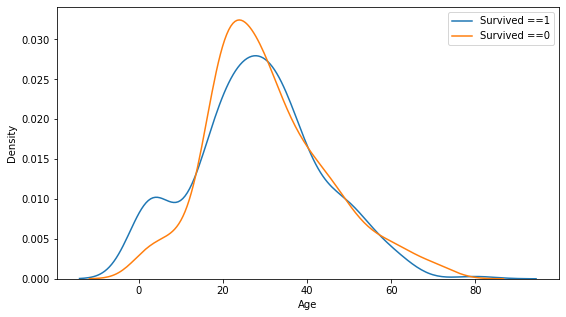

In [ ]:
#생존에 따른 Age의 histogram
fig, ax=plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(train[train['Survived']==1]['Age'],ax=ax)
sns.kdeplot(train[train['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived ==1','Survived ==0'])
plt.show

In [ ]:
#생존자는 나이가 어린 경우가 많다.

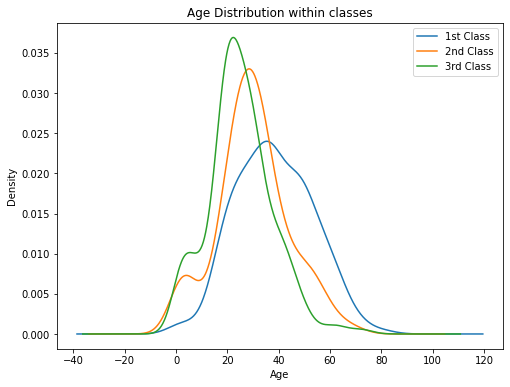

In [ ]:
#Age Distribution within classes
plt.figure(figsize=(8,6))
train['Age'][train['Pclass']==1].plot(kind='kde')
train['Age'][train['Pclass']==2].plot(kind='kde')
train['Age'][train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class','3rd Class'])


In [ ]:
#클래스가 높을수록 나이 많은 사람의 비중이 커짐.

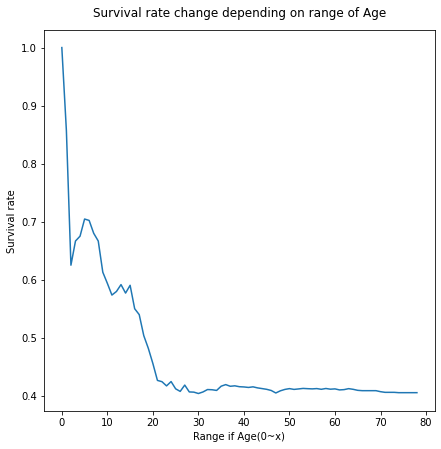

In [ ]:
cummulate_survival_ratio=[]
for i in range(1,80):
  cummulate_survival_ratio.append(train[train['Age'] < i]['Survived'].sum() / len(train[train['Age']<i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range if Age(0~x)')
plt.show()

In [ ]:
#seaborn의 violinplot을 이용하여 모든 데이터를 한번에 관찰

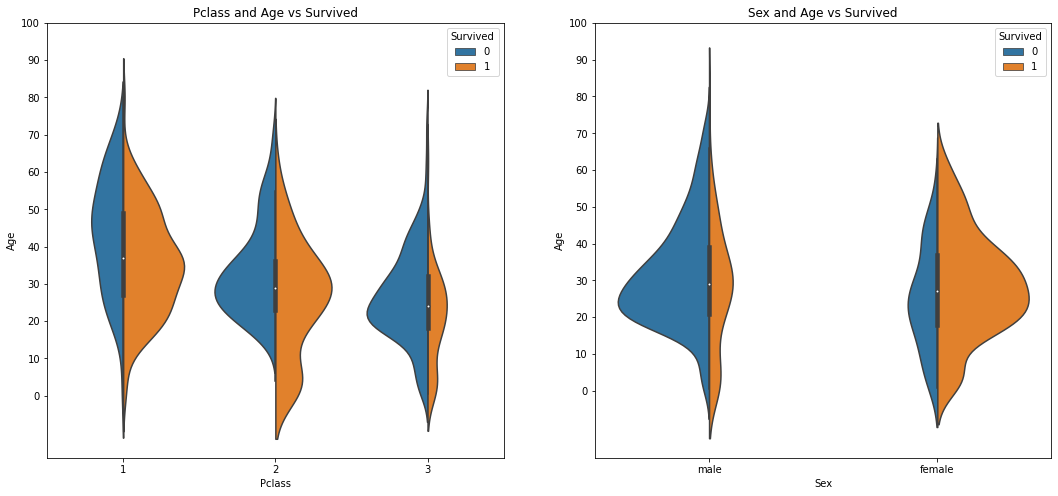

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age",hue="Survived",data=train,scale='count',split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived",data=train,scale='count',split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [ ]:
#어릴수록 생존률이 높고, 여자가 생존을 많이 한 것을 알 수 있다. ->여성과 아이를 먼저 챙겼다.

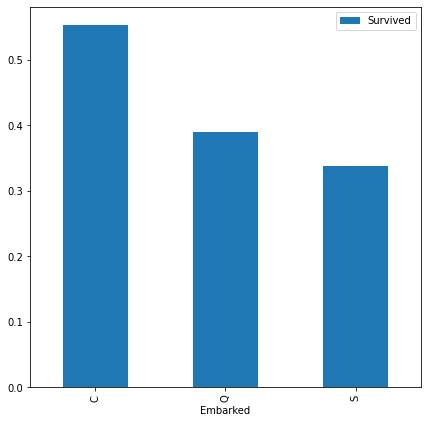

In [ ]:
#Embarked = 탑승한 항구
f, ax = plt.subplots(1,1,figsize=(7,7))
train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax)

In [ ]:
#ascending은 오름차순이라는 뜻. ascending=False로 설정하면 내림차순이 된다.
#C항구에서 가장 생존률이 높음.

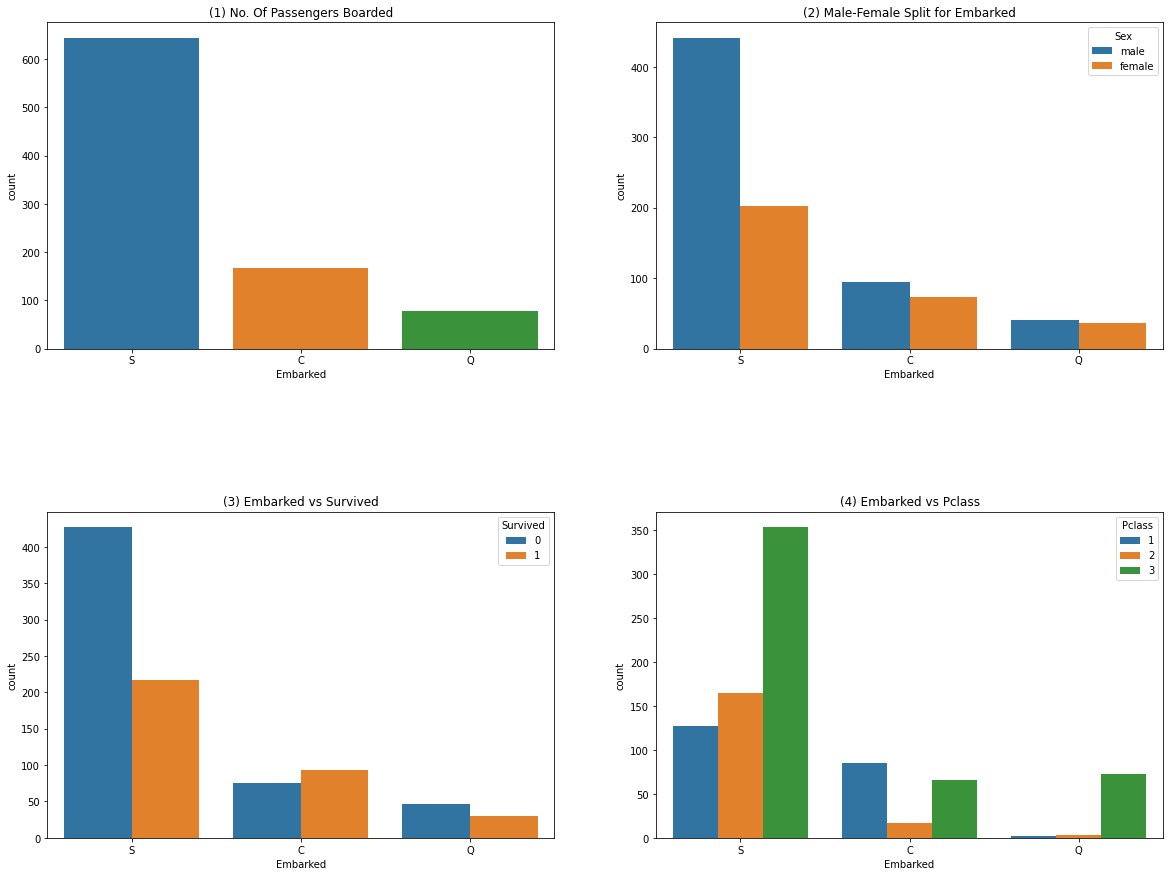

In [ ]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=train,ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=train,ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=train,ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
#figure 1을 봤을 때 S에서 가장 많은 사람이 탑승함.
#figure 2를 봤을 때 C와 Q는 남녀 비율이 비슷하고 S는 남자가 더 많음.
#figure 3을 봤을 때 생존 확률이 S일 경우 낮음
#figure 4를 봤을 때 c의 생존확률이 높은 이유는 클래스가 높은 사람이 많기 때문이다.(S에는 3rd class가 많이 타서 생존률이 낮다.)

In [ ]:
#Sibsp와 parch를 합치면 Family가 될 것이다.->Family로 합쳐서 분석
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1 #자기자신포함
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1 

In [ ]:
print("Maximum size of Family: ", train['FamilySize'].max())
print("Minimum size of Family: ", train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


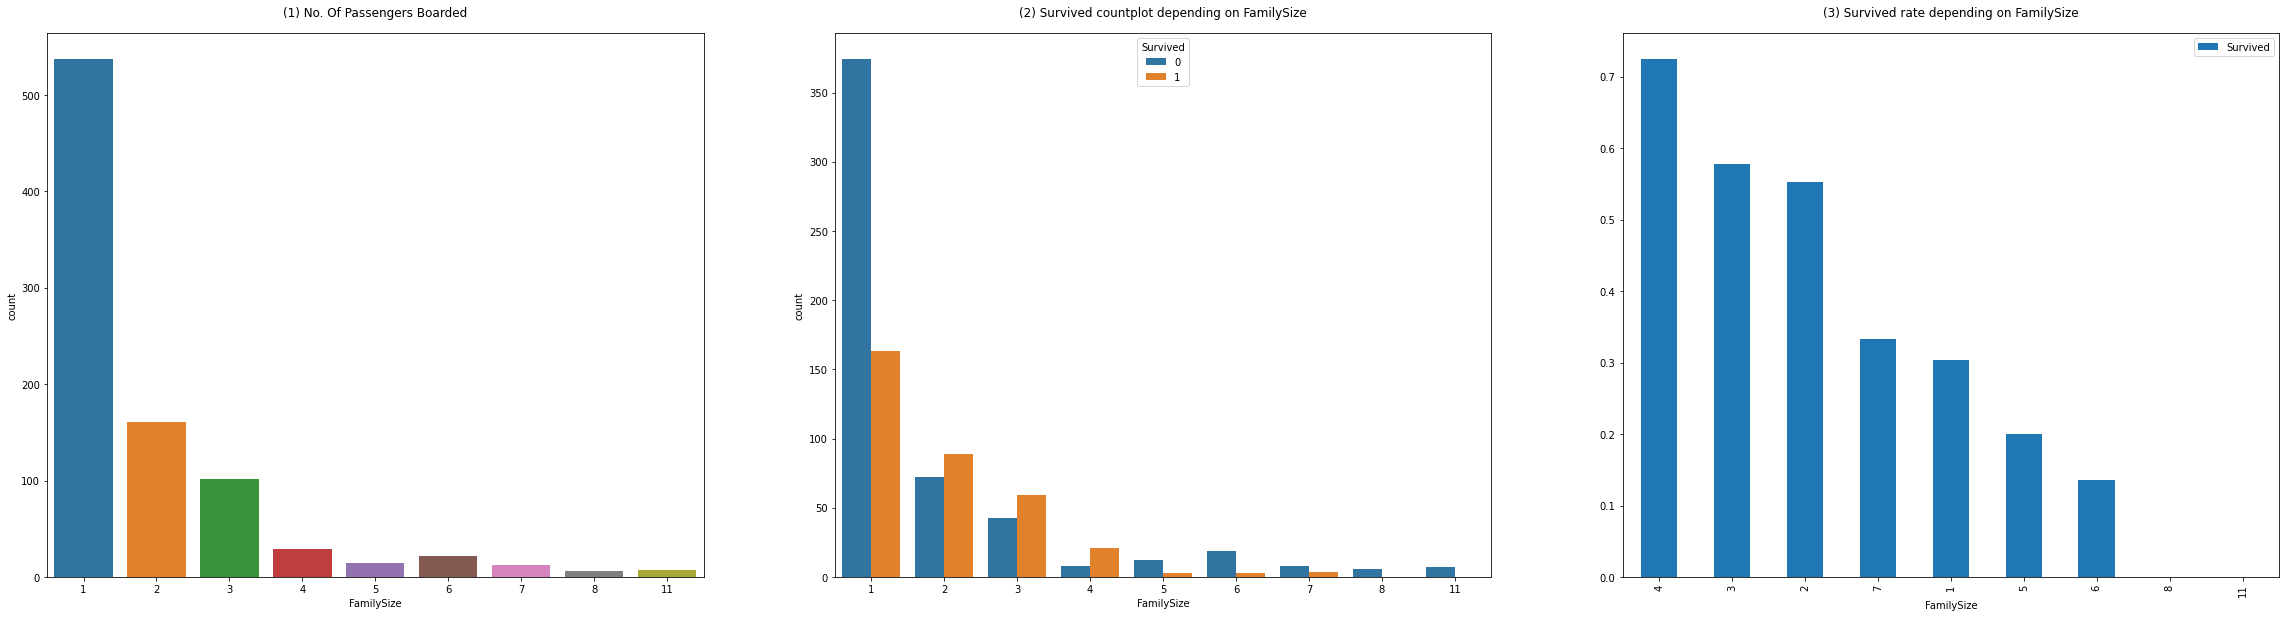

In [ ]:
#familysize와 survive의 관계를 살펴보자.
f,ax=plt.subplots(1,3,figsize=(40,10))
sns.countplot('FamilySize',data=train,ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns. countplot('FamilySize',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',y=1.02)

train[['FamilySize','Survived']].groupby(['FamilySize'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
#figure 1 > 가족 숫자의 분포(대부분 1명)
#figure 2 > 가족 숫자당 살아남은 사람 수 (가족이 많을수록 생존 확률 낮아짐) 3~4명 적당

In [ ]:
#Fare는 탑승요금, contious feature

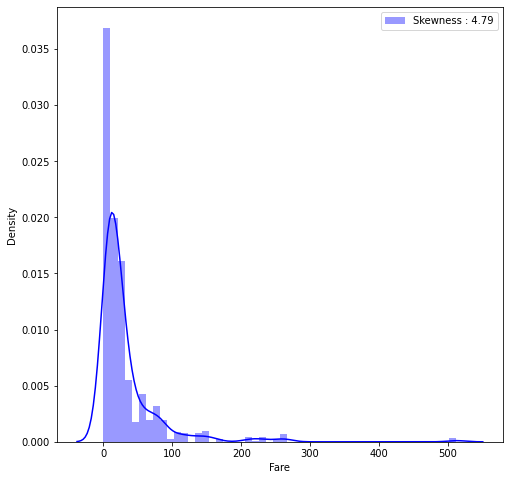

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(train['Fare'],color='b',label='Skewness : {:.2f}'.format(train['Fare'].skew()),ax=ax)
g= g.legend(loc='best')

In [ ]:
#distribution이 매우 비대칭적임. (high skewness) 즉 fare에 log를 취해서 outlier의 영향을 줄임.

In [ ]:
train['Fare'] = train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)


In [ ]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [ ]:
test.loc[test.Fare.isnull(), 'Fare'] = test['Fare'].mean()

In [ ]:
train['Fare'] = train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
test['Fare'] = test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

In [ ]:
#Cabin 데이터는 NaN이 80%이므로 모델에 포함시키지 않는다.

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.683603,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,1.450832,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.727559,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,1.379314,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.735091,NaN,S,1


In [ ]:
train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [ ]:
#Idea : Ticket의 번호에 따른 생존률? 안쪽일수록 살기 힘듬 

In [ ]:
train['Initial']= train.Name.str.extract('([A-Za-z]+)\.')
test['Initial'] = test.Name.str.extract('([A-Za-z]+)\.')

In [ ]:
pd.crosstab(train['Initial'], train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [ ]:
train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,1.190112,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,1.085686,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,0.932798,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,1.207905,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,0.958425,1.222222


In [ ]:
#여성과 관계있는 miss, mr, mrs가 생존률이  높다.

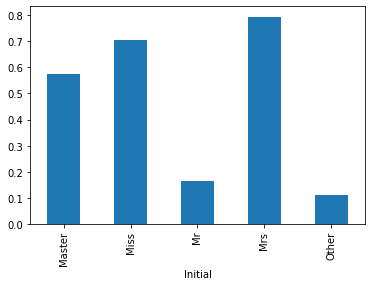

In [ ]:
train.groupby('Initial')['Survived'].mean().plot.bar()

In [ ]:
#null 데이터를 어떻게 채울 것인가? 
#statistics 활용(train에서 얻은 statistics를 기반으로 test의 null data를 채움)

In [ ]:
train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,1.190112,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,1.085686,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,0.932798,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,1.207905,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,0.958425,1.222222


In [ ]:
#Age의 평균을 이용해 Null value를 채운다. 

In [ ]:
train.loc[(train.Age.isnull())&(train.Initial=='Mr'),'Age']= 33 
#isnull()이면서 Initial이 Mr인 조건을 만족하는 row(탑승객)의 Age를 33으로 치환한다.
#Mr의 평균은 32.7이기 때문.
train.loc[(train.Age.isnull())&(train.Initial=='Mrs'),'Age'] = 36
train.loc[(train.Age.isnull())&(train.Initial=='Miss'),'Age']= 22
train.loc[(train.Age.isnull())&(train.Initial=='Master'),'Age']= 5
train.loc[(train.Age.isnull())&(train.Initial=='Other'),'Age']= 46

test.loc[(test.Age.isnull())&(test.Initial=='Mr'),'Age'] = 33
test.loc[(test.Age.isnull())&(test.Initial=='Mrs'),'Age'] = 36
test.loc[(test.Age.isnull())&(test.Initial=='Miss'),'Age'] = 22
test.loc[(test.Age.isnull())&(test.Initial=='Master'),'Age'] = 5
test.loc[(test.Age.isnull())&(test.Initial=='Other'),'Age'] = 46

In [ ]:
#Embarked의 Null Data 채우기
print('Embarked has ', sum(train['Embarked'].isnull()),'Null values')

Embarked has  2 Null values


In [ ]:
#Embarked의 null values는 2개이고 s에서 가장 많은 탑승객이 있었으므로 null data를 S로 채운다.

In [ ]:
train['Embarked'].fillna('S',inplace=True) #fillna method 이용

In [ ]:
#Age Data Change 
#Age는 현재 continuous feature이므로 그룹화해서 나누는 것이 좋음
#loc를 사용해서 직접 바꾸거나 apply를 사용해 함수를 넣는 방법이 있음.

In [ ]:
#loc을 사용한 방법, 나이는 10살 간격으로 나눔.
train['Age_cat'] = 0
train.loc[train['Age'] < 10, 'Age_cat'] = 0
train.loc[(10 <= train['Age']) & (train['Age'] < 20) , 'Age_cat'] = 1
train.loc[(20 <= train['Age']) & (train['Age'] < 30) , 'Age_cat'] = 2
train.loc[(30 <= train['Age']) & (train['Age'] < 40) , 'Age_cat'] = 3
train.loc[(40 <= train['Age']) & (train['Age'] < 50) , 'Age_cat'] = 4
train.loc[(50 <= train['Age']) & (train['Age'] < 60) , 'Age_cat'] = 5
train.loc[(60 <= train['Age']) & (train['Age'] < 70) , 'Age_cat'] = 6
train.loc[70 <= train['Age'] , 'Age_cat'] = 7

test['Age_cat'] = 0
test.loc[train['Age'] < 10, 'Age_cat'] = 0
test.loc[(10 <= test['Age']) & (test['Age'] < 20) , 'Age_cat'] = 1
test.loc[(20 <= test['Age']) & (test['Age'] < 30) , 'Age_cat'] = 2
test.loc[(30 <= test['Age']) & (test['Age'] < 40) , 'Age_cat'] = 3
test.loc[(40 <= test['Age']) & (test['Age'] < 50) , 'Age_cat'] = 4
test.loc[(50 <= test['Age']) & (test['Age'] < 60) , 'Age_cat'] = 5
test.loc[(60 <= test['Age']) & (test['Age'] < 70) , 'Age_cat'] = 6
test.loc[70 <= test['Age'] , 'Age_cat'] = 7


In [ ]:
#함수를 만들어 apply method에 넣어주는 방법. 훨씬 간단하다

In [ ]:
def category_age(x):
  if x<10:
    return 0
  elif x<20:
    return 1
  elif x<30:
    return 2
  elif x<40:
    return 3
  elif x<50:
    return 4
  elif x<60:
    return 5
  elif x<70:
    return 6
  else:
    return 7

train['Age_cat_2'] = train['Age'].apply(category_age) #apply method 이용

In [ ]:
#둘 다 잘 적용되었는지 확인하기 위해 boolean 비교 후 all() method 이용

In [ ]:
print('true 나와라:',(train['Age_cat'] == train['Age_cat_2']).all())

true 나와라: True


In [ ]:
train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
test.drop(['Age'], axis=1, inplace=True)

In [ ]:
train['Initial'] = train['Initial'].map({'Master':0, 'Miss':1, 'Mr':2,'Mrs':3,'Other':4})
test['Initial'] = test['Initial'].map({'Master':0, 'Miss':1, 'Mr':2,'Mrs':3,'Other':4})

In [ ]:
train['Embarked'].unique() #어떤 값이 있는지 확인

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
train['Embarked'] = train['Embarked'].map({'C':0,'Q':1,'S':2})
test['Embarked'] = test['Embarked'].map({'C':0,'Q':1,'S':2})

In [ ]:
train['Embarked'].isnull().any() #True(Null)이 한개라도 있을 시 True 반환

False

In [ ]:
train['Sex'] = train['Sex'].map({'female':0,'male':1})
test['Sex'] = test['Sex'].map({'female':0,'male':1})

In [ ]:
#변수 간의 상관계수(Person correlation)을 구하면 (-1,1) 사이의 값이 나온다. 1로 갈수록 양의 상관관계이고
#0은 상관관계가 없다. 

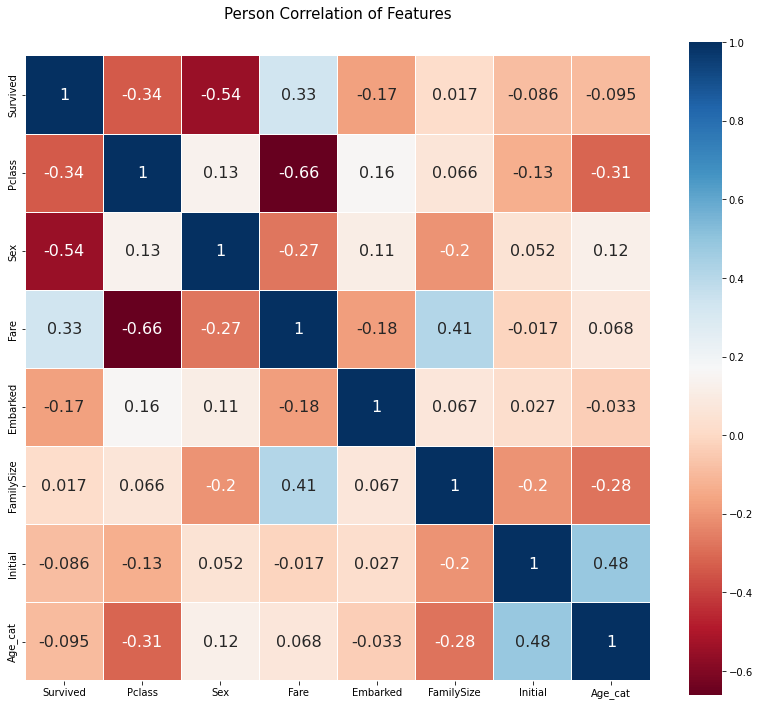

In [ ]:
heatmap_data=train[['Survived','Pclass','Sex','Fare','Embarked','FamilySize','Initial','Age_cat']]
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Person Correlation of Features', y=1.05,size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})
del heatmap_data

In [ ]:
train=pd.get_dummies(train,columns=['Initial'],prefix='Initial')
test=pd.get_dummies(test,columns=['Initial'],prefix='Initial')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,0.683603,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,1.450832,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,0.727559,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,1.379314,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,0.735091,NaN,2,1,3,0,0,1,0,0


In [ ]:
train = pd.get_dummies(train, columns=['Embarked'], prefix='Embarked')
test = pd.get_dummies(test, columns=['Embarked'], prefix='Embarked')

In [ ]:
train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [ ]:
train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,0.683603,2,2,0,0,1,0,0,0,0,1
1,1,1,0,1.450832,2,3,0,0,0,1,0,1,0,0
2,1,3,0,0.727559,1,2,0,1,0,0,0,0,0,1
3,1,1,0,1.379314,2,3,0,0,0,1,0,0,0,1
4,0,3,1,0.735091,1,3,0,0,1,0,0,0,0,1


In [ ]:
test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


In [ ]:
#머신러닝 모델 만들기

In [ ]:
#importing all the required ML packages
from sklearn.ensemble import RandomForestClassifier # 유명한 randomforestclassfier 입니다. 
from sklearn import metrics # 모델의 평가를 위해서 씁니다
from sklearn.model_selection import train_test_split # traning set을 쉽게 나눠주는 함수입니다.

In [ ]:
X_train = train.drop('Survived',axis=1).values
target_label= train['Survived'].values
X_test = test.values

In [ ]:
X_tr, X_vld, y_tr, y_vld= train_test_split(X_train,target_label,test_size=0.3,random_state=2018)

In [ ]:
model=RandomForestClassifier()
model.fit(X_tr,y_tr)
prediction = model.predict(X_vld)

In [ ]:
print('총 {}명 중 {:.2f}% 정확도'.format(y_vld.shape[0],100*metrics.accuracy_score(prediction, y_vld)))

총 268명 중 82.46% 정확도


In [ ]:
from pandas import Series
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=test.columns)
feature_importance = model.feature_importances_Series_feat_imp = Series(feature_importance, index=test.columns)

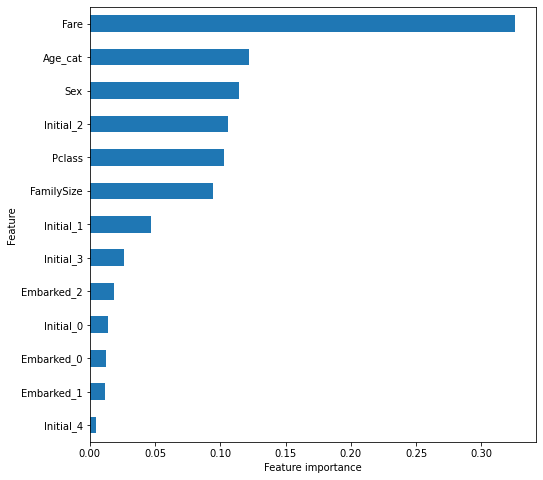

In [ ]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()